##TASK1 of The Sparks Foundation Internship

##Prediction using Supervised Learning

#Name: Vaishnavi Patil

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [14]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
X=pd.read_csv(url)

In [15]:
X.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#EDA

In [16]:
X.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##Checking for null values

In [17]:
X.isnull().sum()

Hours     0
Scores    0
dtype: int64

###Check for correlations among the features

Text(0.5, 1.0, 'Checking for correlation among Features')

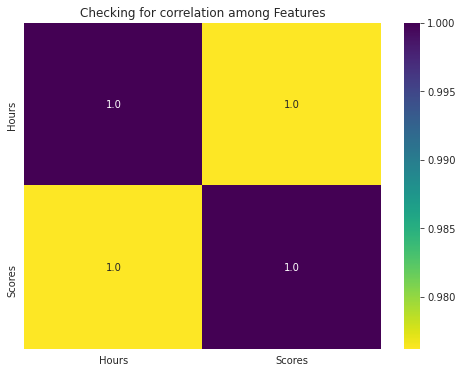

In [18]:
corr=X.corr(method='pearson')
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.heatmap(corr,annot=True,fmt='0.1f',robust=True,cmap='viridis_r')
plt.title('Checking for correlation among Features')

###Check for Outliers

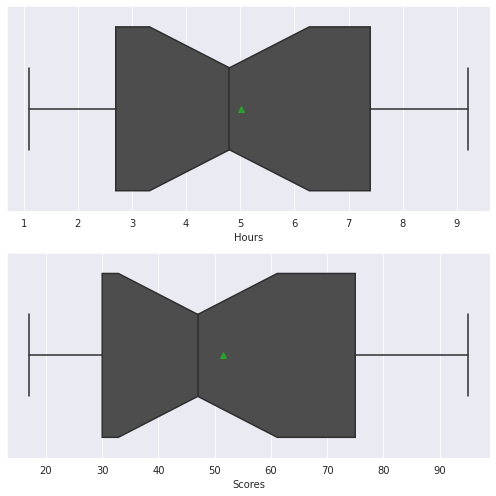

In [19]:
fig,ax=plt.subplots(2,1)
fig.set_size_inches(7,7)
ax[0]=sns.boxplot(x='Hours',data=X,notch=True,
                  showmeans=True,showfliers=True,
                  color='0.30',
                  ax=ax[0])
ax[1]=sns.boxplot(x='Scores',data=X,notch=True,
                  showmeans=True,showfliers=True,
                  color='0.30',
                  ax=ax[1])
plt.tight_layout()

<Figure size 720x576 with 0 Axes>

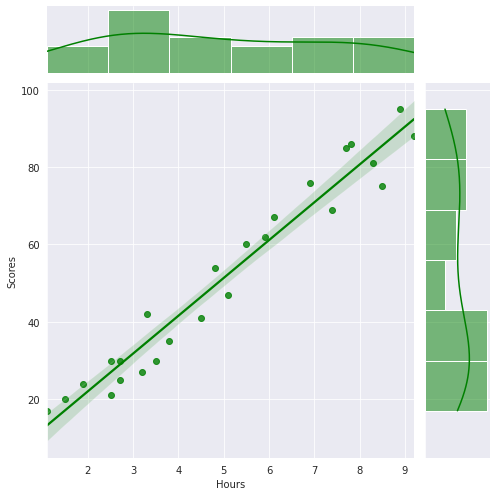

In [20]:
plt.figure(figsize=(10,8))
sns.jointplot(x='Hours',y='Scores',data=X,
              color='g',kind='reg',
              space=0.3,
              height=7)
plt.tight_layout()

In [10]:
y=X.Scores.values
X=X.drop('Scores',axis=1).values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                               random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)
preds=lr.predict(X_test)

###Plotting the Actual values vs the Predicted values

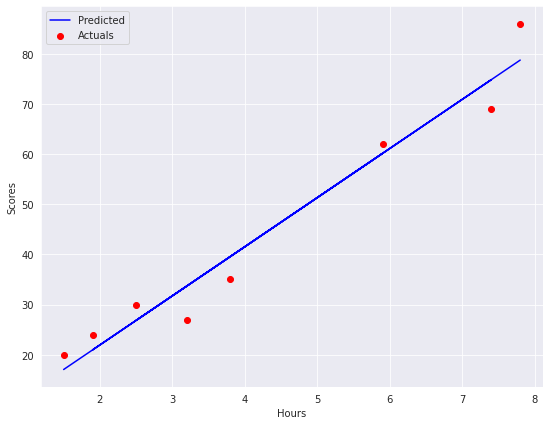

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(9,7))
plt.scatter(X_test,y_test,color='r')
plt.plot(X_test,preds,'b-')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(['Predicted','Actuals'])

###Prediction of score for 9.5 hrs of Study time

In [27]:
pred=lr.predict([[9.5]])
pred

array([95.36219891])

###Evaluate the model

In [12]:
print('r2_score:',r2_score(y_test,preds))
print('Mean Squared Error:',mean_squared_error(y_test,preds))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,preds)))

r2_score: 0.9568211104435257
Mean Squared Error: 22.965097212700428
Root Mean Squared Error: 4.7921912746363144
